# Lab 9: Super Massive Black Holes 

## Contents
1. Astropy Constants
2. Astropy Units
3. Define Variables
4. Event Horizon and Photon Radius
5. Plotting with EHT data



You might have seen the xkcd comic that compares the EHT image of the M87 black hole against distance scales relevant to our Solar System (see image below). In the caption of this image, the artist indicates that the Voyager satellite is just outside the Event Horizon of M87. 

The image also makes it appear as though the black inner part is the full extent of the Event Horizon.

In this lecture we'll compute the relevant size scales to test these two points. 


[xkcd](https://m.xkcd.com/2135/)

![](./m87xkcd.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import math

# 1)  Astropy Constants 

`astropy` is a python package that has a number of useful tools for physicists and astronomers. 
[astropy](https://www.astropy.org/)

In particular, it has a useful way to load `constants` and keep track of `units`.  
[units](http://docs.astropy.org/en/stable/units/) 

[constants](http://docs.astropy.org/en/stable/constants/)

Execute the below cell to load both `units` and `constants`. We will call them using aliases `u` and `const`.

In [2]:
from astropy import units as u
from astropy import constants as const

### Exercise 1

Astropy Constants stores a lot of useful physical constants including units: 

`c` = speed of light

`G` = gravitational constant

`M_sun` = mass of the Sun.

Each constant is called using the following syntax:

`const.name` 

where `name` is the name of the constant, as listed above. and `const` is the alias for the astropy constants package we imported.

#### a) Use the `print` function to print  `const.name` for each above listed constant

In [3]:
print(const.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2014


In [4]:
print(const.G)

  Name   = Gravitational constant
  Value  = 6.67408e-11
  Uncertainty  = 3.1e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2014


In [5]:
print(const.M_sun)

  Name   = Solar mass
  Value  = 1.9884754153381438e+30
  Uncertainty  = 9.236140093538353e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2014


#### b) For each constant, next type `const.name` without the print function into a new code cell. 

In [6]:
const.c

<<class 'astropy.constants.codata2014.CODATA2014'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2014'>

In [7]:
const.G

<<class 'astropy.constants.codata2014.CODATA2014'> name='Gravitational constant' value=6.67408e-11 uncertainty=3.1e-15 unit='m3 / (kg s2)' reference='CODATA 2014'>

In [8]:
const.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.9884754153381438e+30 uncertainty=9.236140093538353e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2014'>

#### c) Define a variable called BigSun.

Give BigSun the value of 100 times the mass of the Sun.
Print the value of BigSun to the screen.

In [11]:
BigSun = 100*const.M_sun
print(BigSun)

1.9884754153381438e+32 kg


# 2)  Astropy Units :  the AU


Astronomers define distance scales in the solar system in terms of the distance between the Earth and the Sun.

This distance is called an Astronomical Unit, or AU. 


### Exercise 2

#### a) Define a variable called `DistSun` with the value of 1 AU using astropy units.  

The syntax is: 

`NUMBER*u.UNIT`  

where `UNIT` is the name of the desired unit, `NUMBER` is the number of those units and `u` is the alias for the astropy units package we imported.

Print `DistSun` to the screen.

Then check the `type` of the variable `DistSun`


In [13]:
DistSun = 1*u.AU
print(DistSun)

1.0 AU


In [14]:
type(DistSun)

astropy.units.quantity.Quantity

#### b) Convert DistSun to km.

The syntax to convert one astropy unit to another is:

`VarName.to(u.UNIT)`  

Where `VarName` is the variable name of what is to be converted and `UNIT` is the desired final unit. 

In [15]:
DistSun.to(u.km)

<Quantity 1.49597871e+08 km>

#### c) Convert DistSun  to parsecs.  A parsec is the distance at which an object 1 AU in size would subtend an angle of one arcsecond.

In [16]:
DistSun.to(u.pc)

<Quantity 4.84813681e-06 pc>

In [19]:
DistSun.to(u.nm)

<Quantity 1.49597871e+20 nm>

In [18]:
DistSun.to(u.m)

<Quantity 1.49597871e+11 m>

**d) Arcseconds**

When we image objects on the sky, the angles they subtend are much smaller than 1 degree.

So, astronomers divide 1 degree into 60, and call that unit an `arcminute` = 1/60th of a degree. 

Sometimes angles are even smaller, and we need to divide by 60 again, defining an `arcsecond` = 1/360th of a degree.

The Moon subtends an angle of 0.5 degrees on the sky.  Convert that angle to `arcsecond`

In [20]:
moon = 0.5*u.degree

In [21]:
moon.to(u.arcsecond)

<Quantity 1800. arcsec>

#### e) Define a new unit.

`astropy`'s `units` module is smart enough to handle custom units.  Let's define a new micro-arcsecond unit and test if converting to this new unit works. We will call this unit `uas` and set it equal to one millionth of an arcsecond.  **We will need this later so make sure you do this part! **

In [22]:
uas = 1e-6*u.arcsecond

# 3) Defining Some Variables

Here we will define variables that will store relevant masses and distance scales. 

### Exercise 3

Define variables that store the masses and distance of each object as instructed below. 

#### a)  Mass of and distance to M87's Black Hole : 
Call these variables M87_BH and DM87_BH

M87_BH = $6.5 \times 10^9$ M$_\odot$ is the mass (Event Horizon Paper IV, 2019)

Where M$_\odot$ is `const.M_sun` and Mpc (megaparsec) is `1e6 * u.parsec`.


and DM87_BH = $16.8$ Mpc is the distance. 


In [23]:
M87_BH = 6.5e9*const.M_sun

In [28]:
DM87_BH = 16.8*1e6*u.parsec

#### b) Mass of and distance to the Milky Way's Black Hole: 

Call these variables MW_BH and DMW_BH. 

MW_BH = $4.0 \times 10^6$ M$_\odot$ (Boehle, Ghez+2016)

and DMW_BH = $7860$ pc 


In [29]:
MW_BH = 4.3e6*const.M_sun

In [30]:
DMW_BH = 8100*u.parsec

#### c) Distance to Pluto  39.5 AU.

Call this variable DPluto and make sure to give it units of AU.

In [31]:
DPluto = 39.5*u.AU

#### d) Distance to Voyager: 141 AU
Call this variable DVoyager. Again with units of AU

In [32]:
DVoyager = 141*u.AU

# 4) The Event Horizon and the Photon Radius

The Event Horizon is defined as the radius at which the escape speed is equal to the speed of light. 

The Photon Radius is the radius at which a photon orbits the central super massive black hole.  

In the below we will define functions to return these radii in AU.


### Exercise 4


#### A)  Define a function called `EventHorizon` 

The function takes one argument, the mass of the black hole (MBH), assumed to be in units of solar mass.  

It returns the Event Horizon in units of AU, where the Event Horizon is defined as the radius where the escape speed from the black hole is the speed of light. 

$ \frac{1}{2}v^2 = \frac{GM}{R}$

Setting $v = c$ and solving for R:

R = Event Horizon = $2 \frac{G M_{BH}}{c^2}$


Where c = `const.c` and G = `const.G`

Convert the units to AU (`VarName.to(u.UNIT)`)

In [33]:
def EventHorizon(MBH):
    """ Funtion that will give the radius where the escape speed from the black hole is the speed of light, or the Event Horizon
    Inputs:
    MBH = mass of the black hole in Msun
    Returns:
    Event Horizon Radius in units of AU"""
    
    EH = 2*const.G*MBH/const.c**2
    return EH.to(u.AU)

#### B) Test your function 

Create a variable called `EH_M87`.
Set that variable equal to EventHorizon for the black hole in M87 and print it to the screen.

In [35]:
EH_M87 = EventHorizon(M87_BH)
print(EH_M87)

128.31817327899722 AU


Create a variable called `EH_MW`. 
Set that variable equal to EventHorizon for the black hole in MW and print it to the screen.


In [36]:
EH_MW = EventHorizon(MW_BH)
print(EH_MW)

0.08488740693841354 AU


#### c) How much larger is the Event Horizon of M87 vs. that of the MW?

In [40]:
EH_M87/EH_MW 

<Quantity 1511.62790698>

### Exercise 5

#### a) Define a function called `PhotonRing `

The function takes one argument, the mass of the black hole in solar mass (MBH).

The function returns the gravitational lensed photon radius, or photon ring radius (Johannsen & Psaltis 2010), which is defined as:

Lensed Photon Ring  $= \sqrt{27}\frac{G M_{BH}}{c^2} \approx 2.6\,\times$ EventHorizon

In [41]:
def PhotonRing(MBH):
    """ A function that will compute the gravitational lensed photon radius, following Johannsen and Psaltis 2010
    Inputs:
    MBH = mass of the black hole in Msun
    Returns:
    The gravitational lensed photon radius"""
    
    return 2.6*EventHorizon(MBH)

#### b) Compute the Photon Radius for the M87_BH .  
Store the value as a variable called PR_M87. 

Print the value of PR_M87 to the screen

In [43]:
PR_M87 = PhotonRing(M87_BH)
print(PR_M87)

333.6272505253928 AU


#### b) Compute the Photon Radius for the MW_BH .  
Store the value as a variable called PR_MW. 

Print the value of PR_MW to the screen

In [44]:
PR_MW = PhotonRing(MW_BH)
print(PR_MW)

0.2207072580398752 AU


## 5) Plot these Radii on top of the EHT Image 


When plotting variables that have units assigned using Astropy, you need to return just the **value** of the variable. 

In [45]:
PR_MW.value

0.2207072580398752

Use `astropy.io.fits` to load the M87 image taken on April 11, 2017, directly from the `eht-imaging` pipeline.

In [46]:
from astropy.io import fits

hdulist = fits.open("SR1_M87_2017_101.fits")
hdulist.info() # Print HDUList info

Filename: SR1_M87_2017_101.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   (64, 64)   float64   


In [47]:
ghdu = hdulist[0] # There is only one GroupHDU
ghdu.header # Print the header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   64                                                  
NAXIS2  =                   64                                                  
OBJECT  = 'M87     '                                                            
CTYPE1  = 'RA---SIN'                                                            
CTYPE2  = 'DEC--SIN'                                                            
CDELT1  = -5.5555555555555E-10                                                  
CDELT2  = 5.55555555555555E-10                                                  
OBSRA   =    187.7059307575226                                                  
OBSDEC  =    12.39112323919932                                                  
FREQ    =       227070703125

We now need to create a dictionary for the size of each pixel of our image. 

In [48]:
# absolute value, because can be negative (direction) 
# dictionary - changing to uas 
# size of pixel in uas 
dx  = (abs(ghdu.header['CDELT1']) * u.degree).to(uas) 
# we have square pixels so dx == dy

Store the image data and set the size of the image. 

In [49]:
# ghdu object has properties header and data 
img = ghdu.data

# number pixels multiplied by size of pixels 
size = img.shape[0] * dx.value # in uas

Now let's plot it! 

Text(-25, -55, '50$\\mu$as')

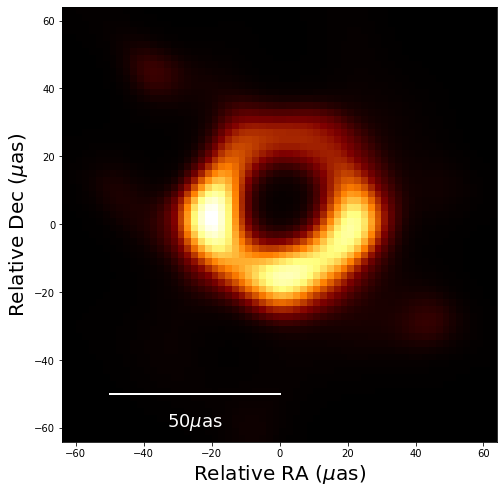

In [50]:

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)


extent = np.array([-size/2,  size/2, -size/2, size/2])

ax.imshow(img, origin='lower', cmap='afmhot', extent=extent)  
# Dr. Chan created a modifed color map specifically EHT !  
# But it requires installing a package - so we are just using the afmhot
# package instead. 

ax.set_xlabel('Relative RA ($\mu$as)', fontsize=20)
ax.set_ylabel('Relative Dec ($\mu$as)', fontsize=20)

ax.plot([-50, 0], [-50, -50], color="white", ls ="-", lw=2)
ax.text(-25, -55, "50$\mu$as", va="top", ha="center", color="w", fontsize=18)

There are some issues.  

The image is very pixelated.
We can fix this by setting the `interpolation` flag in `ax.imshow`


Also the image isn't centered. We can fix this by changing the extents to include an offset in y, `yoffset`. In the real EHT script, this offset is solved for explicitly. But here we will assume a value. 

Text(-25, -55, '50$\\mu$as')

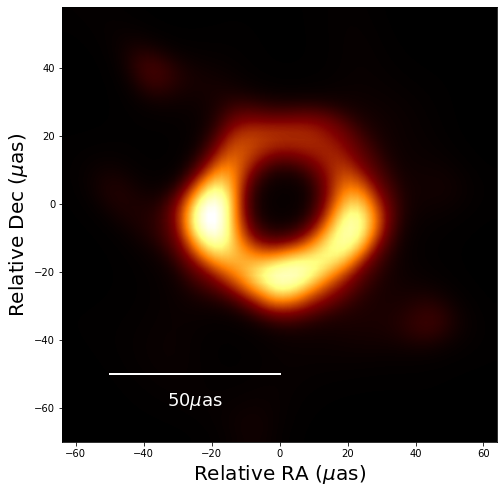

In [51]:

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)


yoffset = 6  # adding an offset to recenter the image. 
extent = np.array([-size/2,      size/2,
                   -size/2-yoffset, size/2-yoffset])

ax.imshow(img, origin='lower', cmap='afmhot', extent=extent, interpolation='bilinear')  
# added the interpolation flag and set it to a "bilinear" interpolation.

ax.set_xlabel('Relative RA ($\mu$as)', fontsize=20)
ax.set_ylabel('Relative Dec ($\mu$as)', fontsize=20)

ax.plot([-50, 0], [-50, -50], color="white", ls ="-", lw=2)
ax.text(-25, -55, "50$\mu$as", va="top", ha="center", color="w", fontsize=18)

Now we will converting the EHT image from micro-arcsecond to AU so that we can overplot the relevant scales we computed earlier. We are using the small angle formula to do this.

Exent of Image in AU = $\Theta [radians] \times \rm{Distance\, to\, M87}$

In [52]:
uas2AU = (uas.to(u.radian).value * DM87_BH).to(u.AU)
extentAU = extent * uas2AU.value
extentAU

array([-1075.19999999,  1075.19999999, -1175.99999999,   974.39999999])

### Exercise 5

**a) Overplot relevant radii on top of the images:**

DPluto -- this already done for you.  Follow this syntax to add the remaining three

Event Horizon

DVoyager

Lensed Photon Radius

**b) Is Voyager outside the Event Horizon? Is the Event Horizon the same size as the black shadow?** 

**c) What would happen to the Photon Radius if you chose a different mass for M87_BH?**

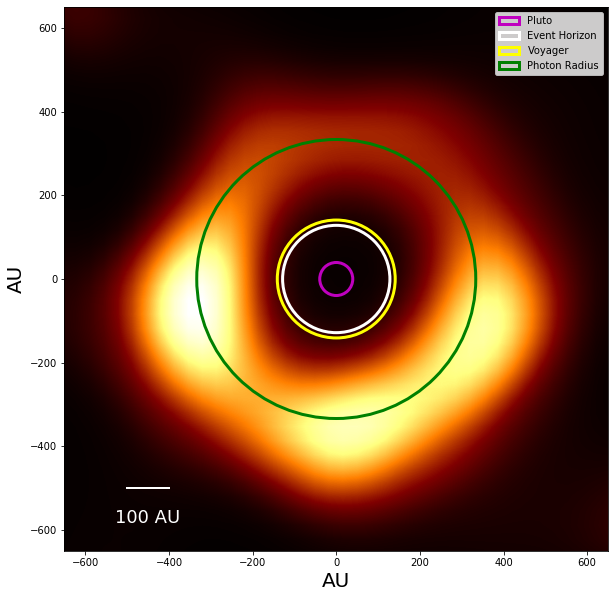

In [58]:
# Create a figure. Equal aspect so circles look circular
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect(1)

# Show the image
ax.imshow(img, origin='lower', cmap='afmhot', extent=extentAU, interpolation='bilinear')


# Orbit of Pluto - edge of solar system
circ_Pluto = plt.Circle( [0,0], DPluto.value, fill=False, color='m', linewidth=3,label='Pluto')
# add the circle to the image
ax.add_patch(circ_Pluto)


# Event Horizon
## FILL THIS IN USING ABOVE TWO LINES. (replace "Pluto", "DPluto" with appropriate names)
circ_EH = plt.Circle( [0,0], EH_M87.value, fill=False, color='white', linewidth=3,label='Event Horizon')
ax.add_patch(circ_EH)


# Radius at Voyager's current location
## FILL THIS IN 
circ_Voyager = plt.Circle( [0,0], DVoyager.value, fill=False, color='yellow', linewidth=3,label='Voyager')
ax.add_patch(circ_Voyager)


# Lensed Photon Radius
## FILL THIS IN 
circ_PR = plt.Circle( [0,0], PR_M87.value, fill=False, color='green', linewidth=3,label='Photon Radius')
ax.add_patch(circ_PR)



# Set the x and y axis labels
ax.set_xlabel('AU',fontsize=20)
ax.set_ylabel('AU',fontsize=20)

# set the x and y axis limits
ax.set_xlim(-650,650)
ax.set_ylim(-650,650)


# provide a scale
ax.plot([-500, -400], [-500, -500], color="white", ls ="-", lw=2)
ax.text(-450, -550, "100 AU", va="top", ha="center", color="w", fontsize=18)

# show the legend
plt.legend(loc='upper right')

# Show the image
plt.show()